In [125]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [126]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


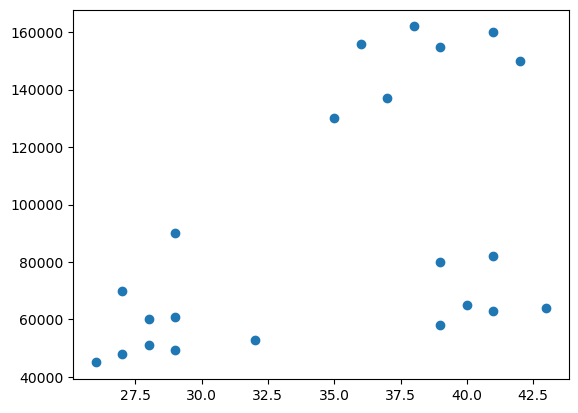

In [127]:
plt.scatter(df['Age'],df["Income($)"])#Visualising my data points of Datasets and analysing that how many datapoints can be there

In [128]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [129]:
#Making new dataframe with only two Columns
y_predicted  =  km.fit_predict(df[['Age','Income($)']])#using KMeans fit technique to see our clusters 
y_predicted

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

So here we entered n_clusters= 3 and we got 0,1,2 in the output array
# Now Lets visual our array of Clusters with graph

For Making this Graph of Clusters we have fit_predicted 
1) We will add the new column and we will add this array in that column as a data
2) Then we will again Scatter that Clusters into graph

In [130]:
df['clusters'] = y_predicted #1)Adding Column in our df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


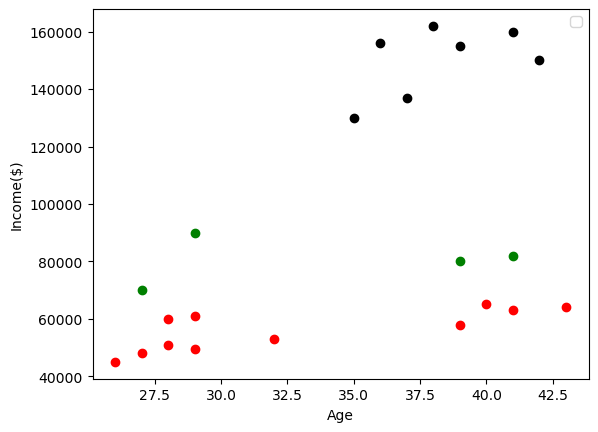

In [131]:
#2)Dividing Each cluster and there datas in different frames now
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
#3) MAtplotLib Code to visualise
plt.scatter(df1.Age,df1["Income($)"],color='red')
plt.scatter(df2.Age,df2["Income($)"],color='black')
plt.scatter(df3.Age,df3["Income($)"],color='green')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [132]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

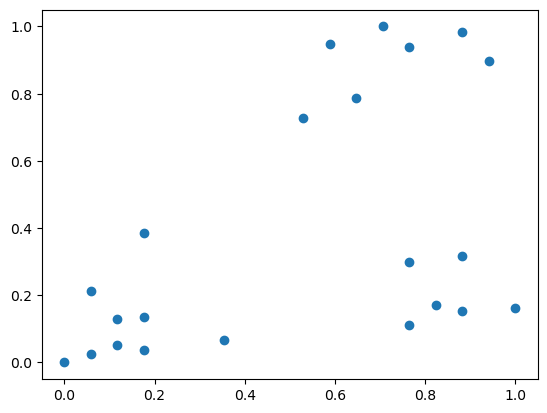

In [133]:
plt.scatter(df.Age,df['Income($)'])

In [134]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [141]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),clusters,cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [1]:
km.cluster_centers_

NameError: name 'km' is not defined

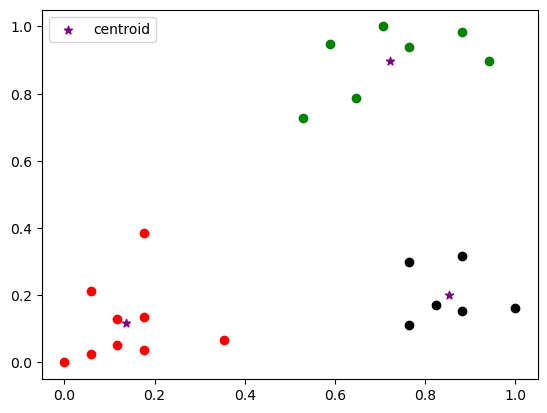

In [143]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Now using Elbow technique 
1) we will get all the sse in an array by using for loop
2) 'km.inertia' is the  term used to calculate SSE


In [150]:
k_range =range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [151]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.18269415744795045,
 0.14083648477890337,
 0.10740235405674733]

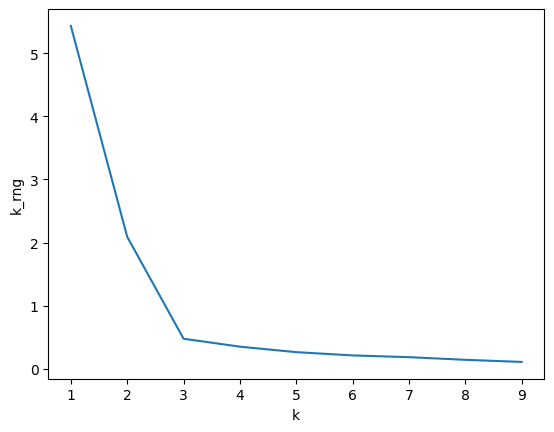

In [159]:
plt.xlabel('k')
plt.ylabel('k_rng')
plt.plot(k_range,sse)
